<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
try:
    df = pd.read_csv('SampleSuperstore.csv')
except FileNotFoundError:
    print("Error: 'samplesuperstore.csv' not found. Please ensure the file exists in the correct directory.")
    exit()

In [4]:
customer_df = df.groupby('Ship Mode')[['Sales', 'Profit', 'Quantity']].sum().reset_index()

In [6]:
imputer = SimpleImputer(strategy='mean')

customer_df[['Sales', 'Profit', 'Quantity']] = imputer.fit_transform(customer_df[['Sales', 'Profit', 'Quantity']])


In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_df[['Sales', 'Profit', 'Quantity']])


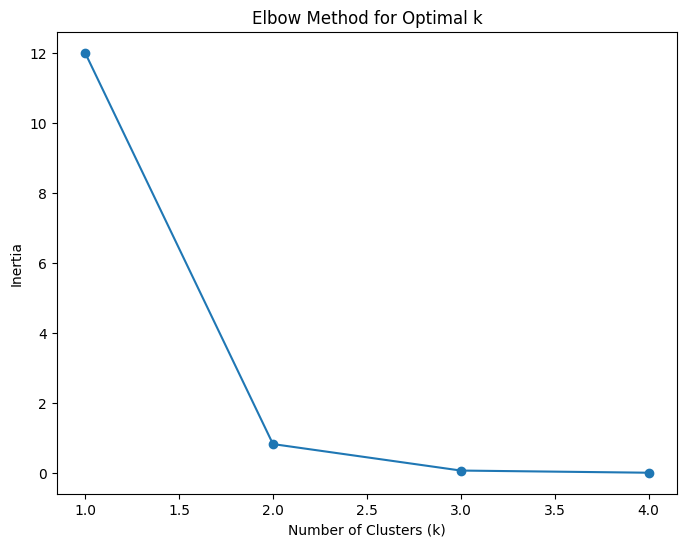

In [10]:
inertia = []

for k in range(1, len(scaled_features) + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scaled_features) + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [11]:
optimal_k = 3

In [12]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)


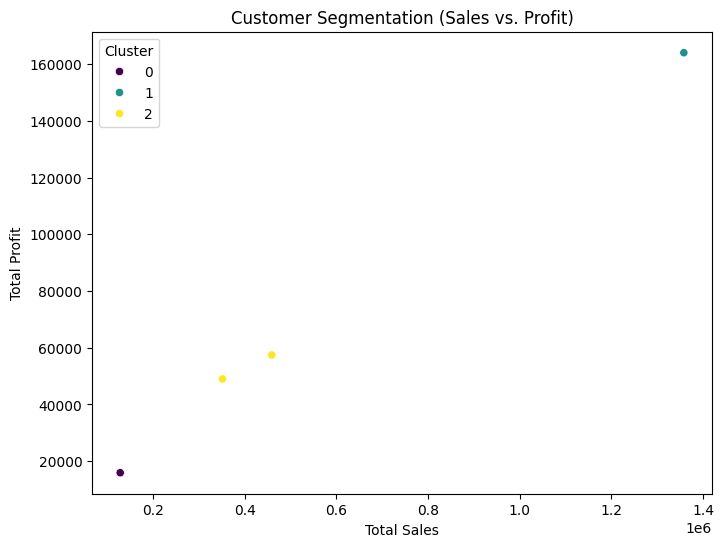

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=customer_df, palette='viridis')
plt.title('Customer Segmentation (Sales vs. Profit)')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.show()

In [14]:
print("\nCluster Interpretations:")
for i in range(optimal_k):
    cluster_data = customer_df[customer_df['Cluster'] == i]
    print(f"Cluster {i}:")
    print(f"  Average Sales: {cluster_data['Sales'].mean():.2f}")
    print(f"  Average Profit: {cluster_data['Profit'].mean():.2f}")
    print(f"  Average Quantity: {cluster_data['Quantity'].mean():.2f}")
    print(f"  Number of Customers: {len(cluster_data)}")
    print("-" * 30)


Cluster Interpretations:
Cluster 0:
  Average Sales: 128363.12
  Average Profit: 15891.76
  Average Quantity: 1960.00
  Number of Customers: 1
------------------------------
Cluster 1:
  Average Sales: 1358215.74
  Average Profit: 164088.79
  Average Quantity: 22797.00
  Number of Customers: 1
------------------------------
Cluster 2:
  Average Sales: 405311.00
  Average Profit: 53208.24
  Average Quantity: 6558.00
  Number of Customers: 2
------------------------------


In [15]:
cluster_sizes = customer_df['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)

cluster_percentages = (customer_df['Cluster'].value_counts(normalize=True) * 100).round(2)
print("\nPercentage of Customers in Each Cluster:")
print(cluster_percentages)


Cluster Sizes:
Cluster
2    2
0    1
1    1
Name: count, dtype: int64

Percentage of Customers in Each Cluster:
Cluster
2    50.0
0    25.0
1    25.0
Name: proportion, dtype: float64


In [17]:
merged_df = pd.merge(df, customer_df[['Ship Mode', 'Cluster']], on='Ship Mode', how='left')

for i in range(optimal_k):
    cluster_orders = merged_df[merged_df['Cluster'] == i]
    print(f"\nOrder Category Distribution for Cluster {i}:")
    print(cluster_orders['Category'].value_counts())
    print("-" * 30)


Order Category Distribution for Cluster 0:
Category
Office Supplies    326
Furniture          119
Technology          98
Name: count, dtype: int64
------------------------------

Order Category Distribution for Cluster 1:
Category
Office Supplies    3638
Furniture          1248
Technology         1082
Name: count, dtype: int64
------------------------------

Order Category Distribution for Cluster 2:
Category
Office Supplies    2062
Furniture           754
Technology          667
Name: count, dtype: int64
------------------------------


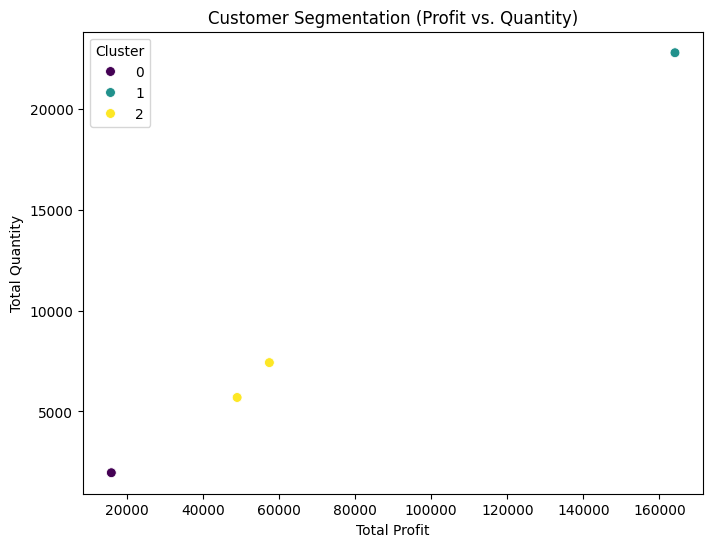

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Profit', y='Quantity', hue='Cluster', data=customer_df, palette='viridis', s=50)
plt.title('Customer Segmentation (Profit vs. Quantity)')
plt.xlabel('Total Profit')
plt.ylabel('Total Quantity')
plt.show()